<h1><center>SCIKIT - LEARN </center></h1> 
<h3><center> MODEL SELECTION </center></h3>


## 1. MOTIVATION AND REFERENCE

This section comes from the SCIKIT-learn demo resources. Author: Raghav RV <rvraghav93@gmail.com> License: BSD.
Is intended to highlight the tools offered by Scikit-learn for a more robust determination of the right specification of the learning model


## 2. DEMONSTRATION OF MULTI-METRIC EVALUATION


Multiple metric parameter search can be done by setting the ``scoring``
parameter:

- to a list of metric scorer names,
- or a dict mapping the scorer names to the scorer callables.

The scores of all the scorers are available in:

- the ``cv_results_`` 
- dict at keys ending in ``'_<scorer_name>'`` (``'mean_test_precision'``,
``'rank_test_precision'``, etc...)

The ``best_estimator_``, ``best_index_``, ``best_score_`` and ``best_params_``
correspond to the scorer (key) that is set to the ``refit`` attribute.


In [ ]:
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook documen

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# This command is used for uploading documentation
print(__doc__)

### 2.1 USING **GridSearchCV** 





**GridSearchCV** carries out an exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

**GridSearchCV** implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### 2.2. CREATE A RANDOM SAMPLE

Generates data for binary classification used in Hastie et al. 2009, Example 10.2. The ten features are standard independent Gaussian and the target y is defined by: y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1

In [10]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

In [38]:
# We have a sample with 10 attributes and 2 labels with 8,000 samples and a seed for the random state set to 42
X.shape

(8000, 10)

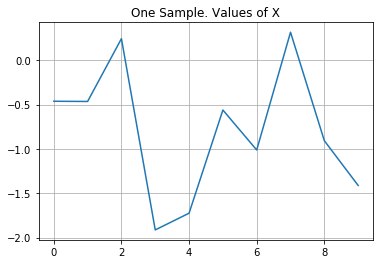

In [42]:
plt.plot(X[1])
plt.grid()
plt.title("One Sample. Values of X")
plt.show()

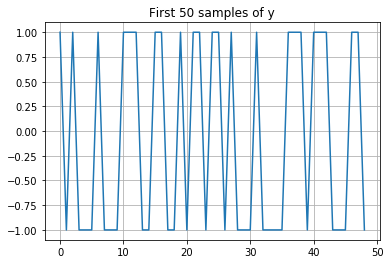

In [57]:
plt.plot(y[1:50])
plt.grid()
plt.title("First 50 samples of y")
plt.show()

### 2.3. THE MEANING OF THE  ROC AUC CRITERION

Source:https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 

In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

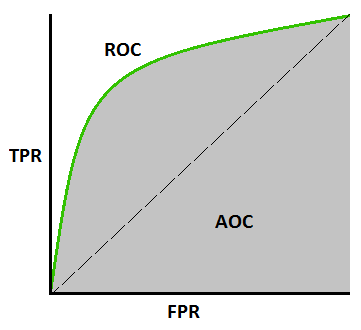

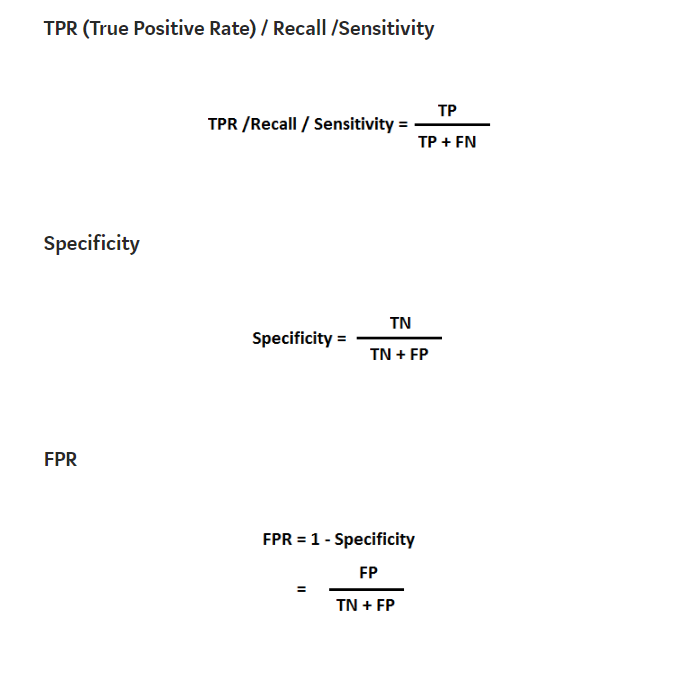

An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.
Let’s interpret above statements.
As we know, ROC is a curve of probability. So lets plot the distributions of those probabilities:
Note: Red distribution curve is of the positive class (patients with disease) and green distribution curve is of negative class(patients with no disease).
This is an ideal situation. When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.

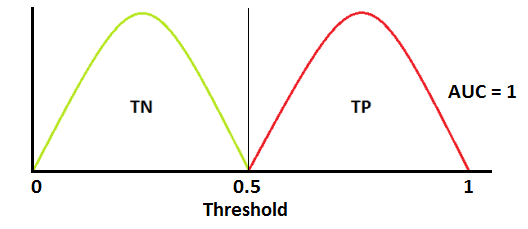

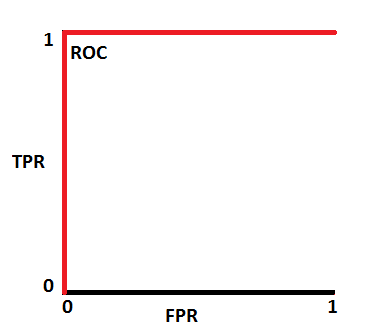

When two distributions overlap, we introduce type 1 and type 2 error. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is 70% chance that model will be able to distinguish between positive class and negative class.

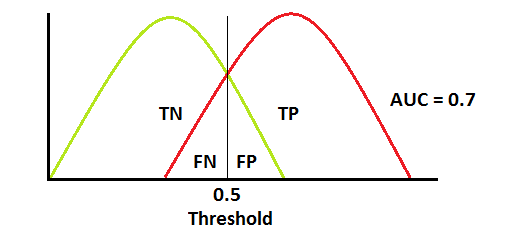

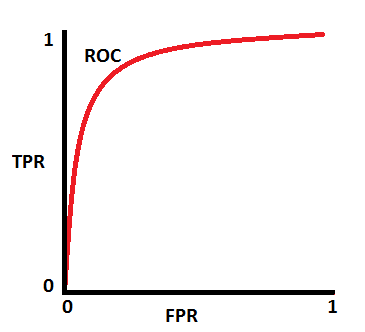

We can have a situation where both distributions ovelap perfectly. This produces the following:

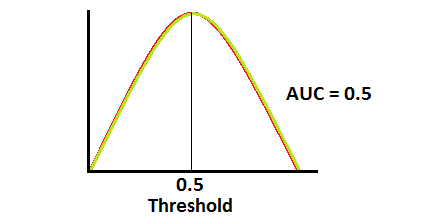

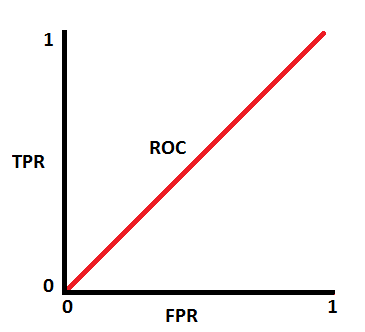


This is the worst situation. When AUC is approximately 0.5, model has no discrimination capacity to distinguish between positive class and negative class.

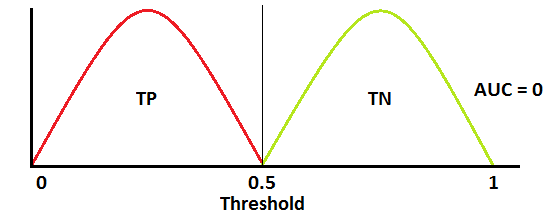

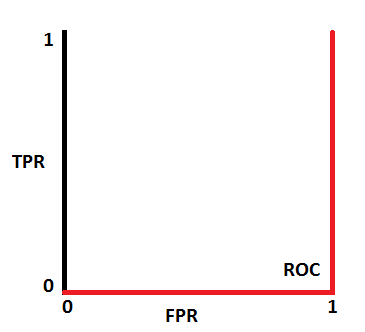

Sensitivity and Specificity are inversely proportional to each other. So when we increase Sensitivity, Specificity decreases and vice versa.


- When we decrease the threshold, we get more positive values thus it increases the sensitivity and decreasing the specificity.

- Similarly, when we increase the threshold, we get more negative values thus we get higher specificity and lower sensitivity. As we know FPR is 1 - specificity. So when we increase TPR, FPR also increases and vice versa.



In multi-class model, we can plot N number of AUC ROC Curves for N number classes using One vs ALL methodology. So for Example, If you have three classes named X, Y and Z, you will have one ROC for X classified against Y and Z, another ROC for Y classified against X and Z, and a third one of Z classified against Y and X.

### 2.4. USING THE AUC REFIT AND PRODUCING THE  ACCURACY METRICS

In [62]:
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


#### SPECIFICATIONS FOR RANDOM TREES 

The model is ran several times to test for different sample splits:

*param_grid={'min_samples_split': range(2, 403, 10)} *

In [63]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, refit='AUC', return_train_score=True)

In [64]:
gs.fit(X, y)
results = gs.cv_results_

### 2.5. RESULTS



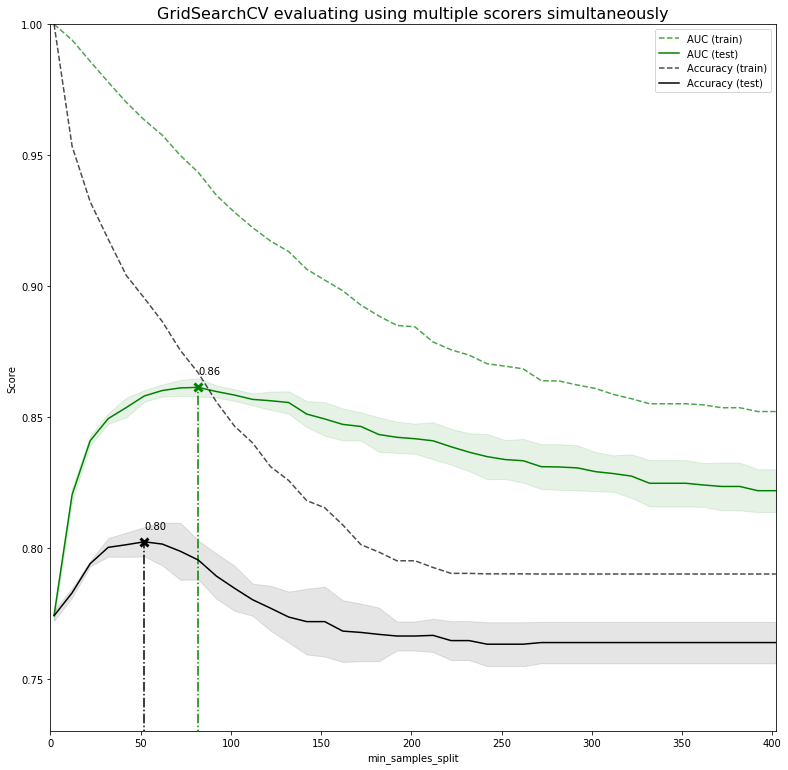

In [66]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()